In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# Прочитаем наш датасет и переводим в переменную для дальнейшего использования
df = pd.read_csv('/content/Чистый список женской одежды.csv')

In [55]:
# Добавим столбец товаров с наценкой 20%
df['Цена с наценкой'] = df['Цена'] + (0.2 * df['Цена'])

In [ ]:
df.iloc[:, [7, 9]]

In [60]:
# Возьмём столбцы с ценой и ценой наценки товаров
X = df.iloc[:, [7, 9]].values

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

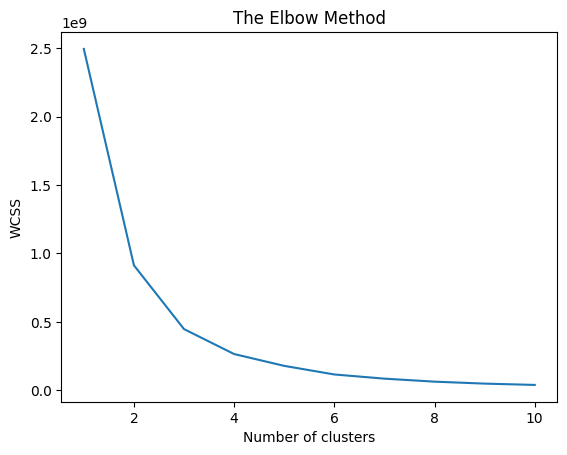

In [61]:
# Методом локтя отберём количество нужных кластеров
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Проводим Кластеризацию
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

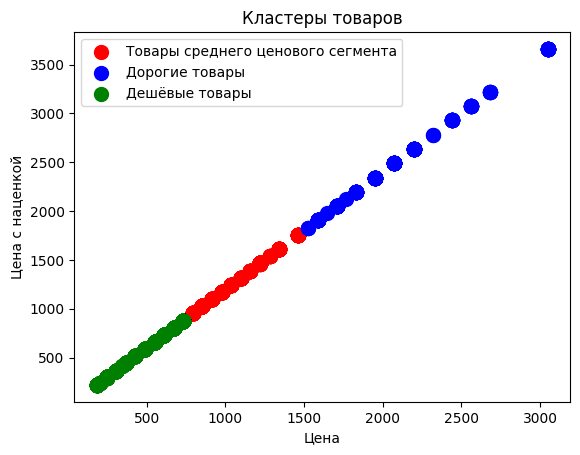

In [73]:
# Визуализируем полученую зависимость Цен
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Товары среднего ценового сегмента')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Дорогие товары')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Дешёвые товары')
plt.title('Кластеры товаров')
plt.xlabel('Цена')
plt.ylabel('Цена с наценкой')
plt.legend()
plt.show()